<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
#Droping first column 
##boston_df = boston_df.iloc[:, 1:]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


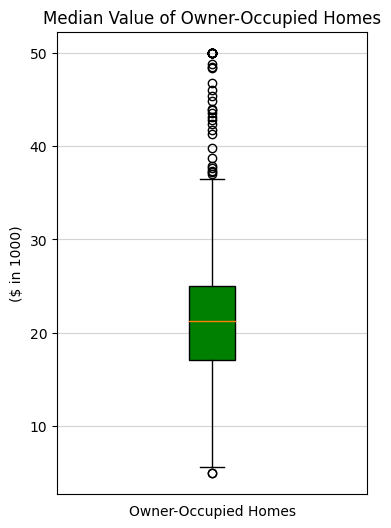

In [9]:
#Task:For the "Median value of owner-occupied homes" provide a boxplot

#Adding headers to dataframe
boston_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
                     'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 6))
plt.boxplot(boston_df['MEDV'], vert=True, patch_artist=True, boxprops=dict(facecolor="green"))
plt.title("Median Value of Owner-Occupied Homes")
plt.ylabel("($ in 1000)")
plt.xlabel("Owner-Occupied Homes")
plt.xticks([])

plt.grid(axis='y', color='lightgray')
plt.show()

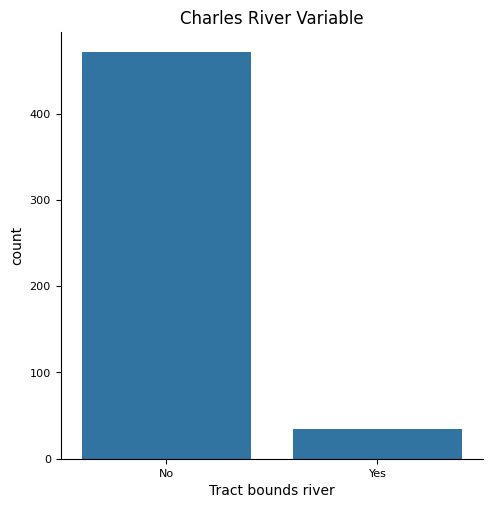

CHAS
No     471
Yes     35
Name: count, dtype: int64


In [10]:
#Task 2: Provide a  bar plot for the Charles river variable


sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title("Charles River Variable")
plt.xlabel("Tract bounds river")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

chas_counts = boston_df['CHAS'].value_counts().rename({0: 'No', 1: 'Yes'})
print(chas_counts)

We can observe that majority of the areas (471) have no bound to the river

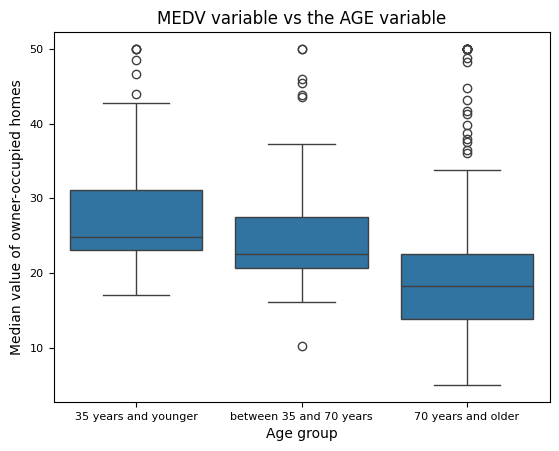

In [11]:
#Task 3: Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

age_group_order = ['35 years and younger', 'between 35 and 70 years', '70 years and older']

plt.title("MEDV variable vs the AGE variable")
plt.ylabel("Median value of owner-occupied homes")
plt.xlabel("Age group")

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df, order=age_group_order)
plt.tick_params(axis='both', which='major', labelsize=8)

We can observe that the lower age of housing in a neighborhood, the higher is the median value of owner-occupied homes. 
We can also see that the number of outlinres is higher in case of '70 years and older' houses meaning that there is more exceptions in prices.

<function matplotlib.pyplot.show(close=None, block=None)>

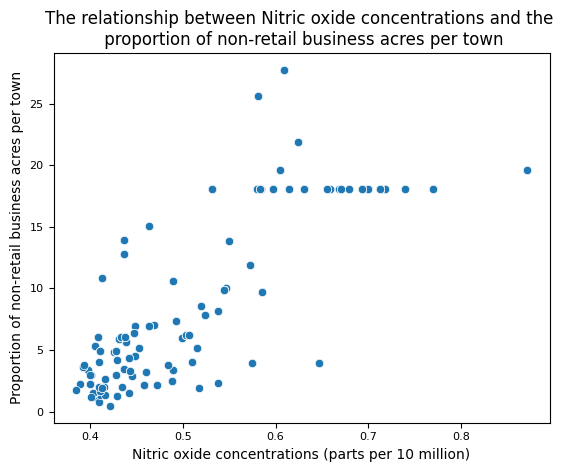

In [12]:
#Task 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations 
#and the proportion of non-retail business acres per town. What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title("The relationship between Nitric oxide concentrations and the \n proportion of non-retail business acres per town")

plt.ylabel("Proportion of non-retail business acres per town")
plt.xlabel("Nitric oxide concentrations (parts per 10 million)")
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show

As the proportion of non-retail business acres (INDUS) increases, the nitric oxide concentration (NOX) tends to rise.
Areas with lower NOX concentrations may be more desirable for residents, potentially leading to higher property values. 
Conversely, higher NOX levels might correlate with lower housing prices.

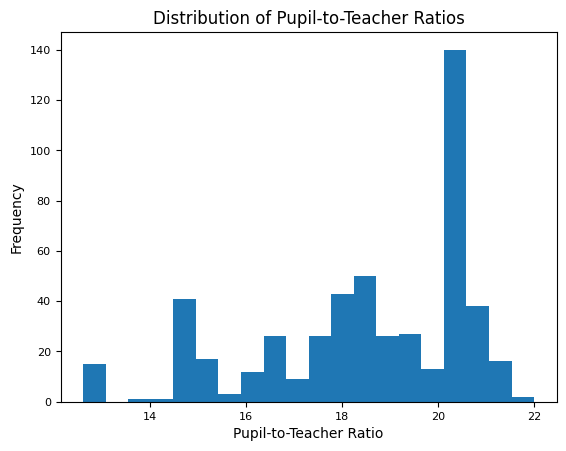

In [13]:
#Task 5: Create a histogram for the pupil to teacher ratio variable

plt.hist(boston_df['PTRATIO'], bins=20, alpha=1)
plt.xlabel("Pupil-to-Teacher Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Pupil-to-Teacher Ratios")
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()


The most common pupil-to-teacher ratios is just above 20.
Indicating that this is the most popular ratio across the dataset. 
This range contains the highest count of 140 occurrences.

In [15]:
#Task 6: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#Hypothesis: H0: u1 = u0, H1: u1 != u0
#Where u1 = the mean of MEDV for tracts that bound the Charles River, u0 = the mean of MEDV for tracts that do not bound the Charles River
#Significance level α = 0.05          

from scipy import stats

group_bound = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_not_bound = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = stats.ttest_ind(group_bound, group_not_bound, equal_var=False)  

print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.3e}")



T-Statistic: 3.113
P-Value: 3.567e-03


Since p-value < 0.05 we reject the null hypothesis. The data provides strong evidence that there is a significant difference in median housing prices (MEDV) between tracts that bound the Charles River and those that do not.

In [19]:
#Task 7: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#Hypothesis: H0: u1 = u2 = u3, H1: At least one of the means differ
#Where u1, u2, u3 represent the mean MEDV for the respective age groups
#Group 1: 35 years and younger
#Group 2: between 35 and 70 years
#Group 3: 70 years and older
#Significance level α = 0.05

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

anova_result = stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

print(f"ANOVA Test Statistic: {anova_result.statistic}")
print(f"ANOVA P-Value: {anova_result.pvalue}")

ANOVA Test Statistic: 36.40764999196599
ANOVA P-Value: 1.7105011022702984e-15


Since the p-value is less than 0.05, we reject the null hypothesis.
There is a statistically significant difference in the median home values (MEDV) between at least two of the age groups.

In [22]:
#Task 8: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#Hypothesis: H0: p = 0, H1 p != 0
#Where p is the correlation coefficient 
#Significance level α = 0.05

X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           7.91e-98
Time:                        23:23:57   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for NOX is extremely small (0.000), which means that the coefficient for NOX is statistically significant at any common significance level (e.g., 0.05).
We can reject the null hypothesis that NOX has no effect on INDUS, suggesting that NOX is a significant predictor of the proportion of non-retail business acres per town. he coefficient for NOX indicates that for each one-unit increase in NOX, the INDUS variable increases by approximately 45.21 units. There is a strong positive relationship between NOX and INDUS. As the concentration of NOX increases, the proportion of non-retail business acres per town (INDUS) increases as well.

In [23]:
#Task 9: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#Hypothesis: H0: no significant relationship between DIS and MEDV, H1: significant relationship between DIS and MEDV
#Significance level α = 0.05

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        23:35:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

The p-value is very low (0.000), the relationship between DIS and MEDV is statistically significant. We can reject the null hypothesis.
The coeficient for the weighted distance to the five Boston rmployment centres is 1.0916. For each unit increase in the weighted distance to the five Boston employment centers, the median value of owner-occupied homes increases by 1.0916 thousand dollars. The positive coefficient means a direct relationship between the distance to employment centers and home values.